Cern Electron Collision. Goal is to predict the invariant mass of two electrons (GeV)

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from IPython.display import Image
from xgboost import XGBRegressor
import optuna

In [16]:
df = pd.read_csv('dielectron.csv')
df.head()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.20267,2.17766,1,11.2836,-1.032340,-1.88066,-11.0778,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.02842,-3.00284,-1,17.1492,-11.713500,5.04474,11.4647,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.42048,2.96560,1,15.8203,-1.472800,2.25895,-15.5888,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.21838,1.00721,1,25.1273,4.087860,2.59641,24.6563,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.09375,-1.37154,-1,13.8871,-0.277757,-2.42560,-13.6708,2.44145,-2.423700,-1.684810,-1,2.74718


In [327]:
df.describe()

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,99915.000000
mean,147935.327230,4.957212e+08,36.436466,0.135897,0.182291,-1.508037,14.412167,-0.064095,0.021614,-0.00548,44.002901,-0.003984,0.124654,-1.590559,13.802036,-0.072830,0.021385,-0.004220,30.019521
std,920.306064,4.037703e+08,41.216203,13.404976,13.470281,51.603652,12.388740,1.462137,1.799562,0.99999,46.751132,13.127404,13.168867,61.430040,12.460549,1.738033,1.817031,0.999996,25.255847
min,146511.000000,6.414000e+03,0.377928,-250.587000,-126.079000,-840.987000,0.219629,-4.165380,-3.141580,-1.00000,0.472500,-233.730000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000,2.000080
25%,147114.000000,2.023970e+08,8.458595,-5.233675,-5.276248,-15.859825,3.771172,-1.283883,-1.527030,-1.00000,11.055725,-4.794770,-4.605965,-22.036950,3.738103,-1.892287,-1.556925,-1.000000,12.445200
50%,147929.000000,3.902759e+08,21.717000,0.141339,0.099092,-0.312987,12.967800,-0.061178,0.034324,-1.00000,25.264600,-0.035638,0.083665,-0.690244,11.690950,-0.135911,0.026986,-1.000000,21.283100
75%,149011.000000,6.338891e+08,50.003350,5.714560,5.648087,13.212650,20.018925,1.144408,1.562355,1.00000,66.925525,4.819540,5.061860,19.005825,19.596400,1.768253,1.596737,1.000000,39.025050
max,149182.000000,1.791247e+09,850.602000,134.539000,147.467000,760.096000,265.578000,2.622970,3.141420,1.00000,948.375000,227.330000,166.283000,935.558000,281.654000,3.060550,3.141290,1.000000,109.999000


In [328]:
df.isnull().sum()

Run       0
Event     0
E1        0
px1       0
py1       0
pz1       0
pt1       0
eta1      0
phi1      0
Q1        0
E2        0
px2       0
py2       0
pz2       0
pt2       0
eta2      0
phi2      0
Q2        0
M        85
dtype: int64

Drop rows where 'M' is null

In [17]:
df = df[df['M'].isnull() == False]
df.isnull().sum()

Run      0
Event    0
E1       0
px1      0
py1      0
pz1      0
pt1      0
eta1     0
phi1     0
Q1       0
E2       0
px2      0
py2      0
pz2      0
pt2      0
eta2     0
phi2     0
Q2       0
M        0
dtype: int64

In [330]:
df.dtypes

Run        int64
Event      int64
E1       float64
px1      float64
py1      float64
pz1      float64
pt1      float64
eta1     float64
phi1     float64
Q1         int64
E2       float64
px2      float64
py2      float64
pz2      float64
pt2      float64
eta2     float64
phi2     float64
Q2         int64
M        float64
dtype: object

Drop 'Run' and 'Event' columns as they are just for identification.

In [18]:
df.drop(['Run', 'Event'], axis=1, inplace=True)

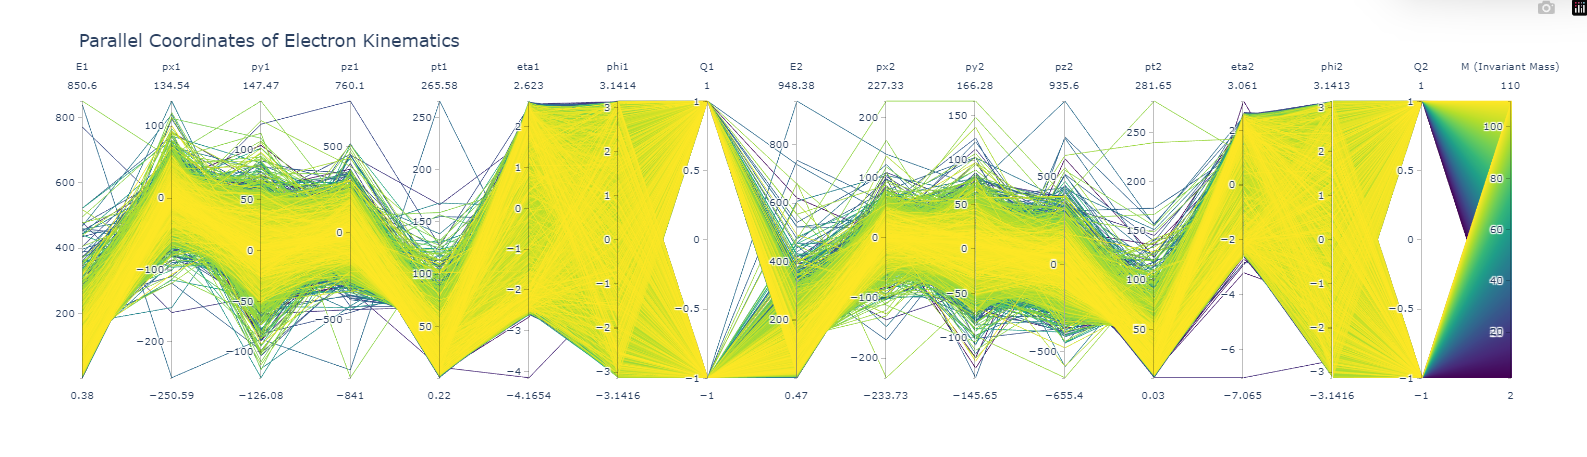

In [ ]:
fig = go.Figure(data=
    go.Parcoords(
        line=dict(color=df['M'], colorscale='Viridis'),
        dimensions=list([
            dict(label='E1', values=df['E1']),
            dict(label='px1', values=df['px1']),
            dict(label='py1', values=df['py1']),
            dict(label='pz1', values=df['pz1']),
            dict(label='pt1', values=df['pt1']),
            dict(label='eta1', values=df['eta1']),
            dict(label='phi1', values=df['phi1']),
            dict(label='Q1', values=df['Q1']),
            dict(label='E2', values=df['E2']),
            dict(label='px2', values=df['px2']),
            dict(label='py2', values=df['py2']),
            dict(label='pz2', values=df['pz2']),
            dict(label='pt2', values=df['pt2']),
            dict(label='eta2', values=df['eta2']),
            dict(label='phi2', values=df['phi2']),
            dict(label='Q2', values=df['Q2']),
            dict(label='M (Invariant Mass)', values=df['M']),
        ])
    )
)

fig.update_layout(title='Parallel Coordinates of Electron Kinematics')
Image('figures/BaseParallelPlot.png')


There seems to be outliers for most of the features. I used the Parallel Coordinates graph to see the values I need to remove.

In [333]:
df.shape

(99915, 17)

These values were found by just looking at the graph.

In [19]:
df = df[df['E1'] < 450]
df = df[df['px1'] > -130]
df = df[df['py1'] < 120]
df = df[df['pt1'] < 130]
df = df[df['eta1'] > -4]
df = df[df['E2'] < 620]
df = df[(df['px2'] < 120) & (df['px2'] > -120)]
df = df[(df['py2'] > -100) & (df['py2'] < 120)]
df = df[(df['pz2'] < 520) & (df['pz2'] > -500)]
df = df[df['pt2'] < 130]
df = df[df['eta2'] > -6]

In [335]:
df.shape

(99856, 17)

Removed 59 outliers. Parallel Coordinates should look a lot better.

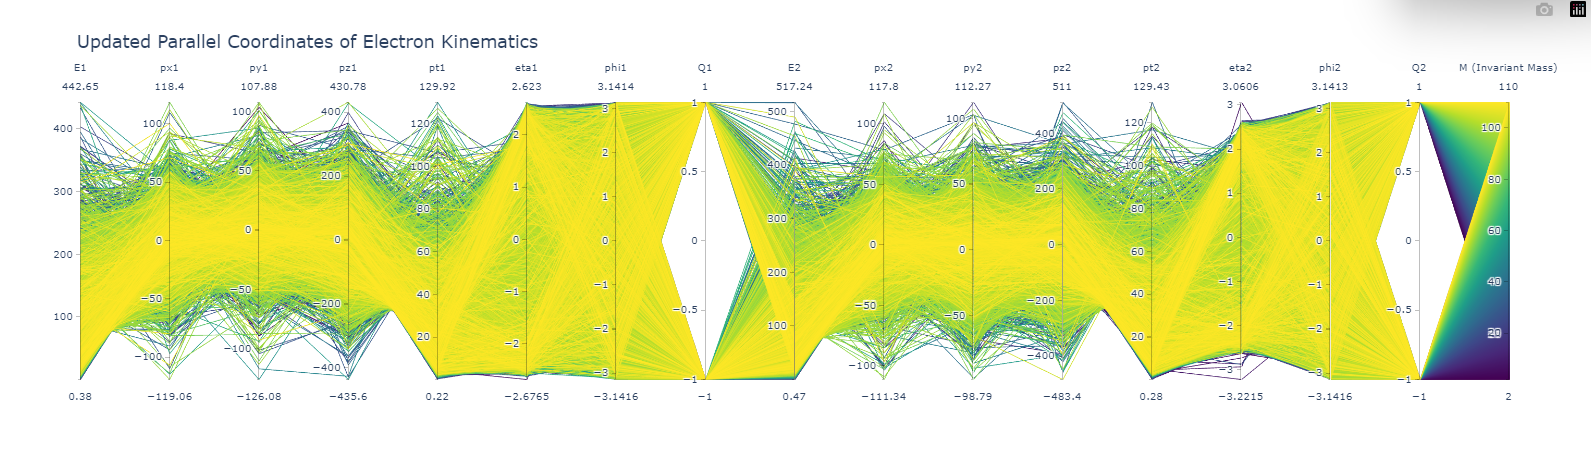

In [336]:
fig = go.Figure(data=
    go.Parcoords(
        line=dict(color=df['M'], colorscale='Viridis'),
        dimensions=list([
            dict(label='E1', values=df['E1']),
            dict(label='px1', values=df['px1']),
            dict(label='py1', values=df['py1']),
            dict(label='pz1', values=df['pz1']),
            dict(label='pt1', values=df['pt1']),
            dict(label='eta1', values=df['eta1']),
            dict(label='phi1', values=df['phi1']),
            dict(label='Q1', values=df['Q1']),
            dict(label='E2', values=df['E2']),
            dict(label='px2', values=df['px2']),
            dict(label='py2', values=df['py2']),
            dict(label='pz2', values=df['pz2']),
            dict(label='pt2', values=df['pt2']),
            dict(label='eta2', values=df['eta2']),
            dict(label='phi2', values=df['phi2']),
            dict(label='Q2', values=df['Q2']),
            dict(label='M (Invariant Mass)', values=df['M']),
        ])
    )
)

fig.update_layout(title='Updated Parallel Coordinates of Electron Kinematics')
Image('figures/UpdatedParallelPlot.png')

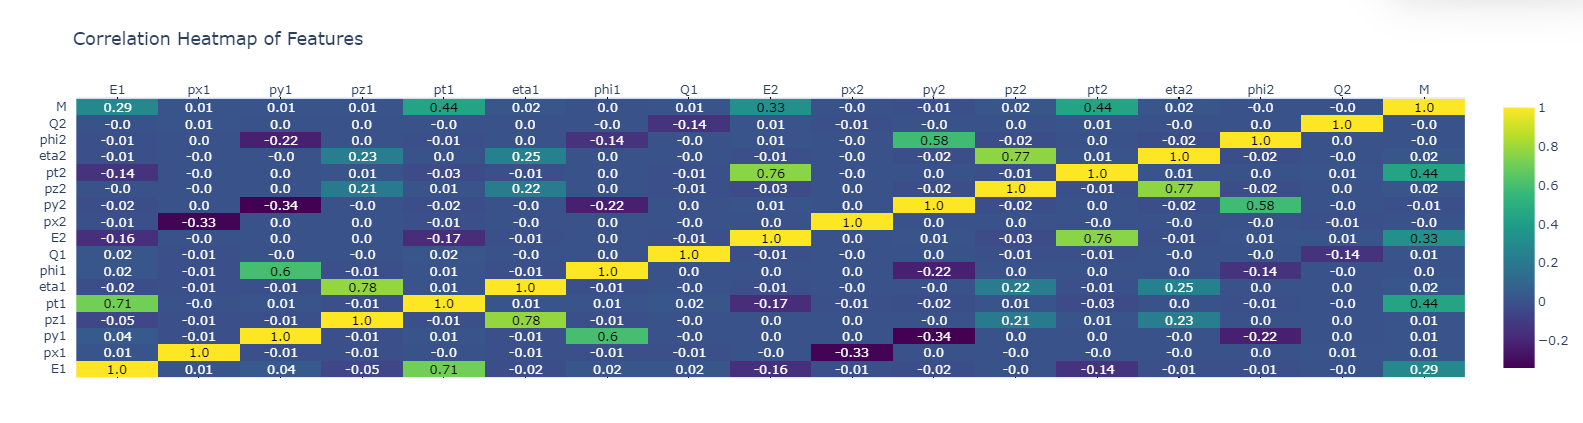

In [337]:
corr = df.corr()
z = np.round(corr.values, 2)

fig = ff.create_annotated_heatmap(
    z=z,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    showscale=True,
    colorscale='Viridis'
)

fig.update_layout(title='Correlation Heatmap of Features')
Image('figures/BaseHeatMap.png')


Not great Correlation between most features. Add some different features that help capture more information and see if they correlate with M more. Chat-gpt helped me with physics related stuff.

In [20]:
# 1. Are both electrons the same charge? (1 = yes, 0 = no)
df['same_sign'] = (df['Q1'] == df['Q2']).astype(int)

# 2. Reconstruct full momentum magnitude for each electron
df['p1_magnitude'] = np.sqrt(df['px1']**2 + df['py1']**2 + df['pz1']**2)
df['p2_magnitude'] = np.sqrt(df['px2']**2 + df['py2']**2 + df['pz2']**2)

# 3. Euclidean distance between electron momenta in 3D space
df['momentum_diff_mag'] = np.sqrt(
    (df['px1'] - df['px2'])**2 +
    (df['py1'] - df['py2'])**2 +
    (df['pz1'] - df['pz2'])**2
)

# 4. Total energy of the two-electron system
df['total_energy'] = df['E1'] + df['E2']

# 5. Difference in pseudorapidity
df['delta_eta'] = df['eta1'] - df['eta2']

# 6. Angular separation in phi
df['delta_phi'] = np.abs(df['phi1'] - df['phi2'])
df['delta_phi'] = np.where(df['delta_phi'] > np.pi, 2 * np.pi - df['delta_phi'], df['delta_phi'])

#Reordering so it's easier to see M on heatmap
cols = df.columns.tolist()
cols.remove('M')
df = df[['M'] + cols]

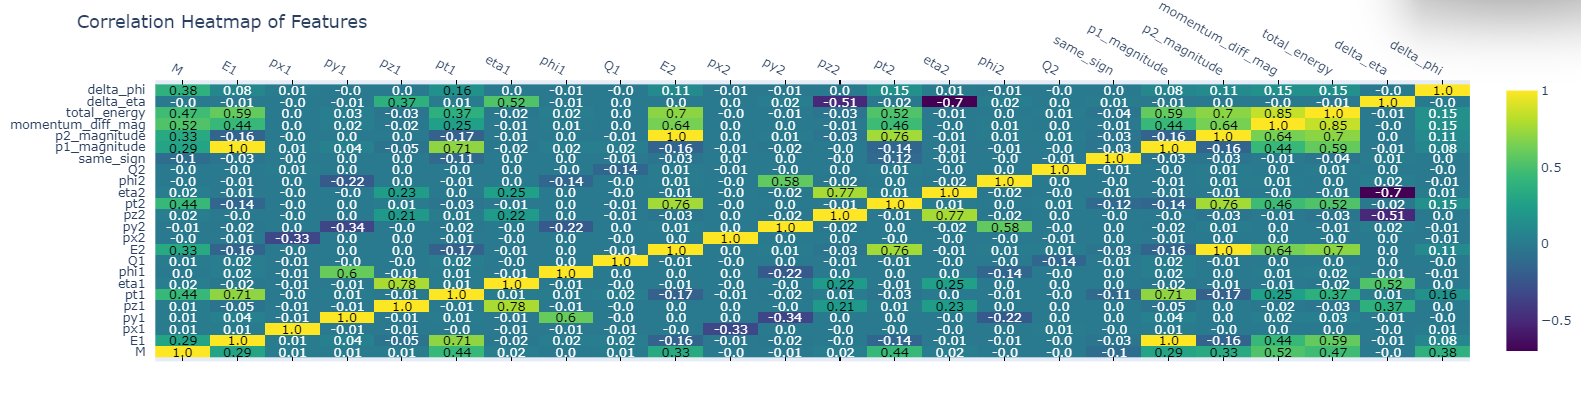

In [339]:
corr = df.corr()
z = np.round(corr.values, 2)

fig = ff.create_annotated_heatmap(
    z=z,
    x=corr.columns.tolist(),
    y=corr.columns.tolist(),
    showscale=True,
    colorscale='Viridis'
)

fig.update_layout(title='Correlation Heatmap of Features')
Image('figures/UpdatedHeatMap.png')


New features show stronger Corellation with M then raw features.

In [21]:
y = df['M']
X = df.drop('M', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=62)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (79884, 23)
X_test shape: (19972, 23)
y_train shape: (79884,)
y_test shape: (19972,)


Going to create two SGD Regressor models, one with robust scaling and one with standard scaling.

In [341]:
robust_pipe = make_pipeline(RobustScaler(), SGDRegressor(random_state=62))
standard_pipe = make_pipeline(StandardScaler(), SGDRegressor(random_state=62))
print(f'Robust R2 Score: {np.mean(cross_val_score(robust_pipe, X_train, y_train, cv=5, scoring='r2'))}')
print(f'Robust RMSE Score: {-np.mean(cross_val_score(robust_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'))}')
print(f'Standard R2 Score: {np.mean(cross_val_score(standard_pipe, X_train, y_train, cv=5, scoring='r2'))}')
print(f'Standard RMSE Score: {-np.mean(cross_val_score(standard_pipe, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'))}')

Robust R2 Score: 0.5298940383365345
Robust RMSE Score: 17.340740109376718
Standard R2 Score: 0.5318158400458414
Standard RMSE Score: 17.305214788450815


Standard Scaling outperforms Robust Scaling in this case. I want to scale the data for XGB Regressor even though it is unnecessary

In [342]:
xgb = make_pipeline(XGBRegressor(random_state=62))
print(f'Base XGB R2 Score: {np.mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2'))}')
print(f'Base XGB RMSE Score: {-np.mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'))}')
xgb_pred = xgb.fit(X_train, y_train).predict(X_test)
print(f'Base XGB R2 Test Score: {r2_score(y_test, xgb_pred)}')
print(f'Base XGB RMSE Test Score: {root_mean_squared_error(y_test, xgb_pred)}')

Base XGB R2 Score: 0.9928259159752655
Base XGB RMSE Score: 2.1418973205279928
Base XGB R2 Test Score: 0.9926426137401684
Base XGB RMSE Test Score: 2.147524129478262


Default Parameters of XGB Regressor absolutely dwarfs default parameters of SGD Regressor which isn't surprising at all. See if selecting better features improves performance.

In [343]:

from sklearn.feature_selection import SelectKBest, f_regression
xgb = make_pipeline(SelectKBest(score_func=f_regression, k=20), XGBRegressor(random_state=62))
print(f'XGB R2 Score: {np.mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='r2'))}')
print(f'XGB RMSE Score: {-np.mean(cross_val_score(xgb, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'))}')

XGB R2 Score: 0.9855061339752702
XGB RMSE Score: 3.006251901684293


It does not improve performance. All thats left is to run XGB through optuna.

In [344]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 300, 1500),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 5.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 5.0)
    }

    model = XGBRegressor(**params, random_state=62, n_jobs=-1, tree_method='hist')
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error')
    return -scores.mean()

In [346]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10, show_progress_bar=True)

[I 2025-06-01 18:30:49,366] A new study created in memory with name: no-name-51d0033a-040f-4343-899c-6678c65d30c4


  0%|          | 0/10 [00:00<?, ?it/s]

[I 2025-06-01 18:31:25,580] Trial 0 finished with value: 1.4906527455874894 and parameters: {'n_estimators': 357, 'max_depth': 9, 'min_child_weight': 2, 'learning_rate': 0.1265684803942876, 'subsample': 0.7765567435229577, 'colsample_bytree': 0.6293365192290754, 'reg_alpha': 2.058216088471437, 'reg_lambda': 4.485821345129502}. Best is trial 0 with value: 1.4906527455874894.
[I 2025-06-01 18:32:00,929] Trial 1 finished with value: 1.6054774497627537 and parameters: {'n_estimators': 1172, 'max_depth': 3, 'min_child_weight': 7, 'learning_rate': 0.1589596395482189, 'subsample': 0.8314735832368354, 'colsample_bytree': 0.9796097937333664, 'reg_alpha': 0.36159373610283985, 'reg_lambda': 2.6720326357023474}. Best is trial 0 with value: 1.4906527455874894.
[I 2025-06-01 18:36:02,399] Trial 2 finished with value: 1.7061891750834044 and parameters: {'n_estimators': 1397, 'max_depth': 12, 'min_child_weight': 4, 'learning_rate': 0.21290472230278576, 'subsample': 0.7758517156058262, 'colsample_bytre

In [348]:
print("Best RMSE:", study.best_value)
print("Best hyperparameters:", study.best_params)

best_model = XGBRegressor(**study.best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2_score = r2_score(y_test,y_pred)
print("Test RMSE:", rmse)
print("Test R2 Score: ", r2_score)


Best RMSE: 1.382954092521409
Best hyperparameters: {'n_estimators': 1380, 'max_depth': 6, 'min_child_weight': 2, 'learning_rate': 0.14590668695592526, 'subsample': 0.5175770108286383, 'colsample_bytree': 0.7728150113481782, 'reg_alpha': 4.600105866026521, 'reg_lambda': 2.4349838401484676}
Test RMSE: 1.3445559695074611
Test R2 Score:  0.997115933813094


Very solid model, an R2 score of 0.9971 is borderline perfect.

In [22]:
best_model = XGBRegressor(n_estimators= 1380, max_depth= 6, min_child_weight= 2, learning_rate= 0.14590668695592526, subsample= 0.5175770108286383, colsample_bytree= 0.7728150113481782, reg_alpha= 4.600105866026521, reg_lambda= 2.4349838401484676)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print("Test RMSE:", rmse)
print("Test R2 Score: ", r2)


Test RMSE: 1.3445559695074611
Test R2 Score:  0.997115933813094


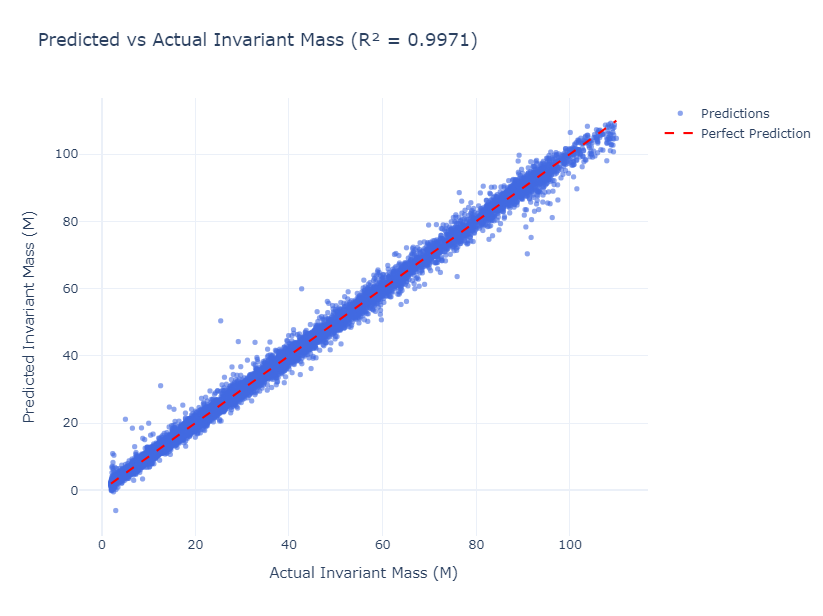

In [24]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=y_test,
    y=y_pred,
    mode='markers',
    name='Predictions',
    marker=dict(color='royalblue', size=5, opacity=0.6)
))

# Add ideal line (y = x)
fig.add_trace(go.Scatter(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    mode='lines',
    name='Perfect Prediction',
    line=dict(color='red', dash='dash')
))

fig.update_layout(
    title=f'Predicted vs Actual Invariant Mass (R² = {r2_score(y_test, y_pred):.4f})',
    xaxis_title='Actual Invariant Mass (M)',
    yaxis_title='Predicted Invariant Mass (M)',
    width=800,
    height=600,
    template='plotly_white'
)

Image('figures/predicted.png')